Objective:

Perform EDA such as number of data samples, number of features, number of classes, number of data samples per class, removing missing values, conversion to numbers, using seaborn library to plot different graphs.

Dataset taken of World Hapiness Report 2021

In [12]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #using seaborn library for visualisation
import matplotlib.pyplot as plt #visualisation
from matplotlib import pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)


In [13]:
df = pd.read_csv("dataforlab1.csv") #reading the data
df.head(5) # To display the top 5 rows 

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [14]:
df.tail(3) #to display the bottom three rows

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [15]:
len(df.columns) #to get the number of features (which is basicallu no of columnsof the dataset)

20

In [16]:
len(df) #this gives us the number of samples

149

In [17]:
df.shape #to get the structure/dimension of the data

(149, 20)

In [18]:
df.dtypes #checking the data types

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [19]:
#number of classes, number of data samples per class

In [20]:
print(df.isnull().sum()) #to check if there are any missing or null values

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64


In [21]:
#renaming column
df = df.rename(columns={"Country name": "Country","Ladder score": "Ladder_score"})
df.head(5)

,Country,Regional indicator,Ladder_score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [22]:
#dropping extra/irrelevant columns
df = df.drop(['Regional indicator', 'Standard error of ladder score','Logged GDP per capita','Social support','Generosity','Perceptions of corruption','Freedom to make life choices','Healthy life expectancy','upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia'], axis=1)
df.head(5)

,Country,Ladder_score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [23]:
#to check if we have any duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [24]:
df.count() #no of rows/data samples present

Country                                       149
Ladder_score                                  149
Explained by: Log GDP per capita              149
Explained by: Social support                  149
Explained by: Healthy life expectancy         149
Explained by: Freedom to make life choices    149
Explained by: Generosity                      149
Explained by: Perceptions of corruption       149
Dystopia + residual                           149
dtype: int64

Since there are no missing values present in the data set hence we won't need to perform commands to remove those (df = df.dropna()  is used)

We now take sum of all factors to do comparison for visualisation

In [25]:
def sum_frame_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame)
sum_frame_by_column(df, 'total', ['Explained by: Log GDP per capita','Explained by: Social support','Dystopia + residual','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption'])
df.head(5)

,Country,Ladder_score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,total
0,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481,3.253,7.842
1,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2.868,7.620
2,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2.839,7.570
3,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2.967,7.554
4,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2.798,7.464


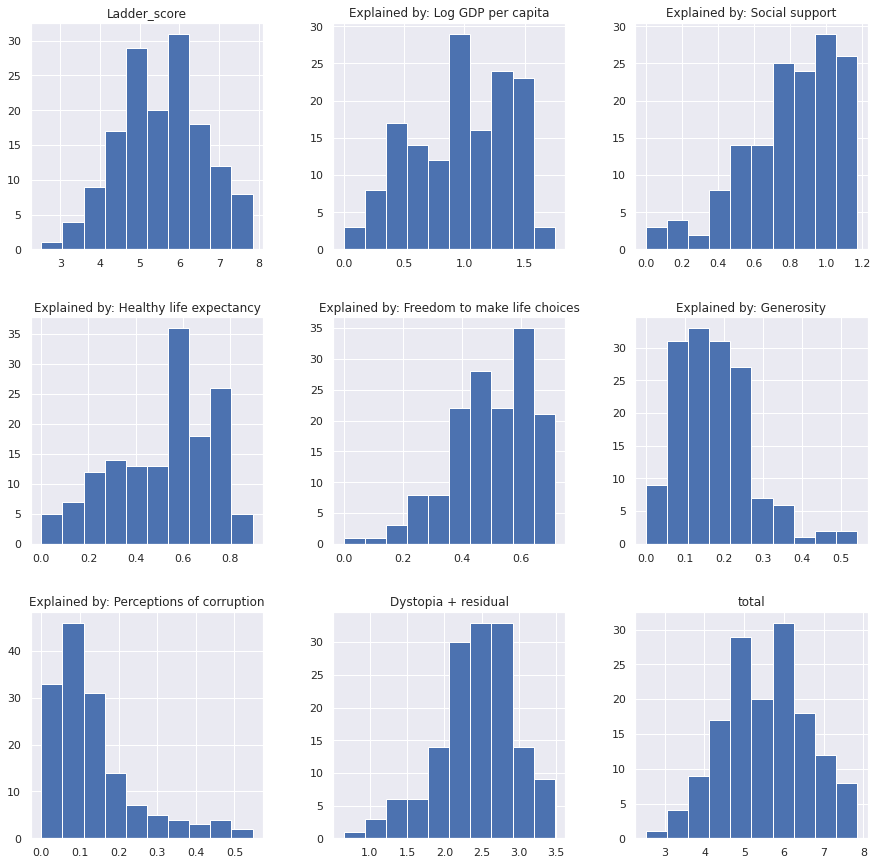

In [26]:
df.hist(figsize=(15,15))
plt.show()
#A histogram groups numbers into ranges (or bins) and the height of a bar shows how many numbers fall in that range. 
#df.hist() plots a histogram of the data’s numeric features in a grid.

Now before having different types of plots we will identfy and remove the outliers: An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that we are going to perform is called IQR score technique.

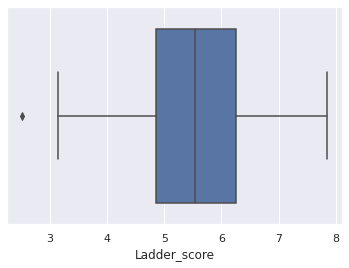

In [27]:
sns.boxplot(x=df['Ladder_score'])

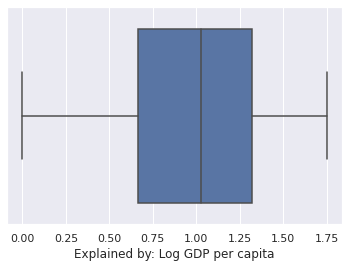

In [28]:
sns.boxplot(x=df['Explained by: Log GDP per capita'])


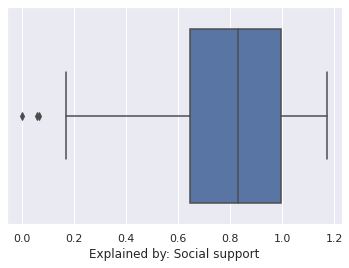

In [29]:
sns.boxplot(x=df['Explained by: Social support'])

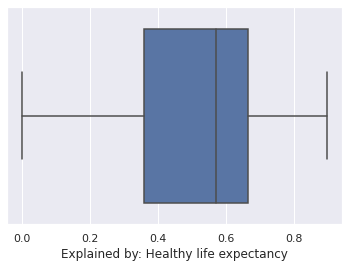

In [30]:
sns.boxplot(x=df['Explained by: Healthy life expectancy'])

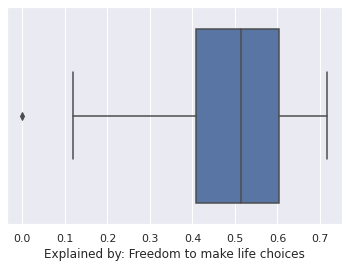

In [31]:
sns.boxplot(x=df['Explained by: Freedom to make life choices'])

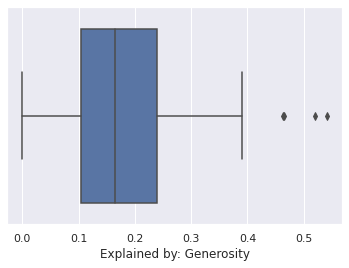

In [32]:
sns.boxplot(x=df['Explained by: Generosity'])

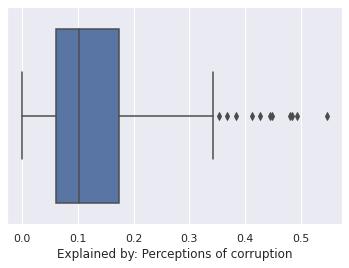

In [33]:
sns.boxplot(x=df['Explained by: Perceptions of corruption'])

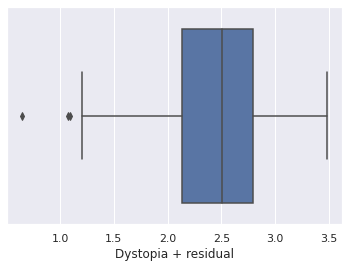

In [34]:
sns.boxplot(x=df['Dystopia + residual'])

In [35]:
#finding inter quartile range (IQR) to remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Ladder_score                                  1.403
Explained by: Log GDP per capita              0.657
Explained by: Social support                  0.349
Explained by: Healthy life expectancy         0.308
Explained by: Freedom to make life choices    0.194
Explained by: Generosity                      0.134
Explained by: Perceptions of corruption       0.114
Dystopia + residual                           0.656
total                                         1.403
dtype: float64


In [36]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(129, 10)

We see that around 20 rows were outliers which are now removed

,Ladder_score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,total
Ladder_score,1.000000,0.766114,0.717737,0.744790,0.555835,-0.023062,0.286961,0.473364,1.000000
Explained by: Log GDP per capita,0.766114,1.000000,0.744175,0.837202,0.320708,-0.226481,0.229929,-0.095894,0.766071
Explained by: Social support,0.717737,0.744175,1.000000,0.673590,0.380786,-0.118672,0.122627,-0.058857,0.717772
Explained by: Healthy life expectancy,0.744790,0.837202,0.673590,1.000000,0.363807,-0.179333,0.265520,-0.071849,0.744748
Explained by: Freedom to make life choices,0.555835,0.320708,0.380786,0.363807,1.000000,0.185737,0.258325,0.140113,0.555820
Explained by: Generosity,-0.023062,-0.226481,-0.118672,-0.179333,0.185737,1.000000,0.140346,0.015317,-0.023016
Explained by: Perceptions of corruption,0.286961,0.229929,0.122627,0.265520,0.258325,0.140346,1.000000,-0.052135,0.286880
Dystopia + residual,0.473364,-0.095894,-0.058857,-0.071849,0.140113,0.015317,-0.052135,1.000000,0.473408
total,1.000000,0.766071,0.717772,0.744748,0.555820,-0.023016,0.286880,0.473408,1.000000


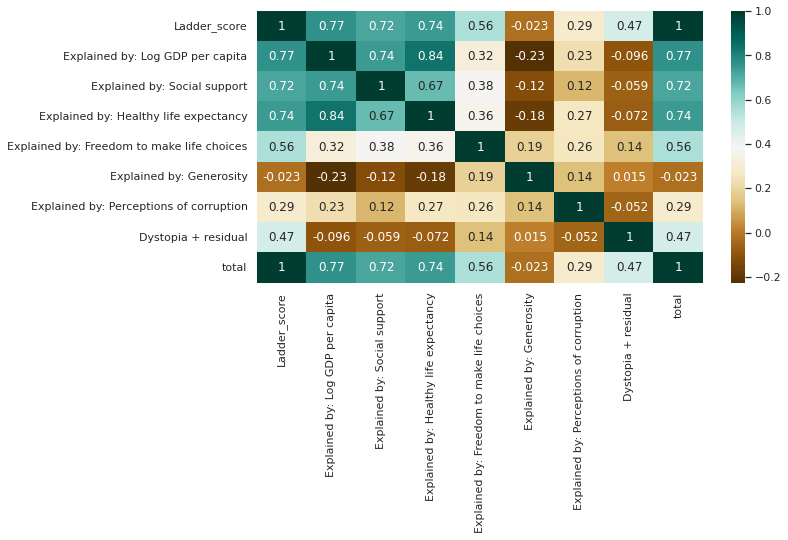

In [41]:
#Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps via which we can find correlation between various factors and features. 
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

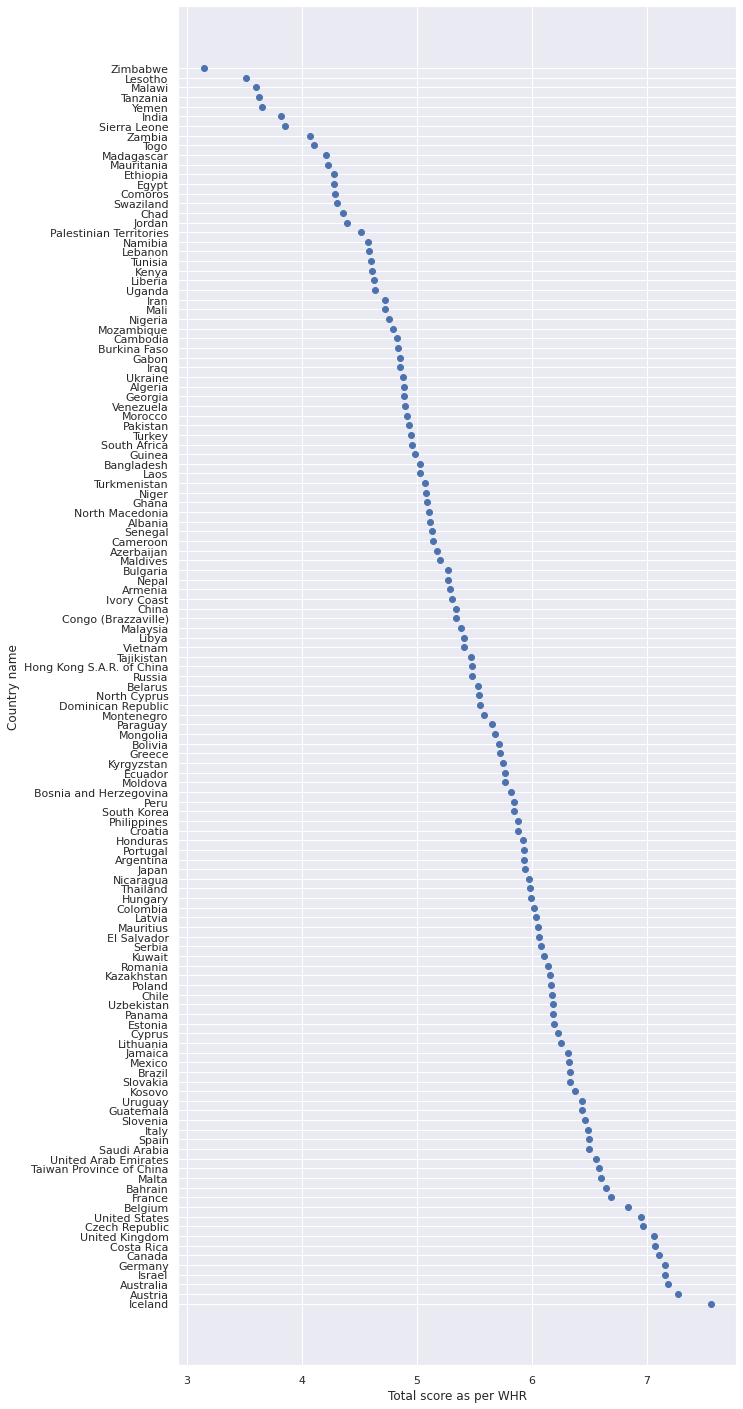

In [47]:
#We generally use scatter plots to find the correlation between two variables. 
fig, ax = plt.subplots(figsize=(10,25))
ax.scatter(df['total'], df['Country'])
ax.set_xlabel('Total score as per WHR')
ax.set_ylabel('Country name')
plt.show()

Conclusion: Hence we have successfully implemented Exploratory Data Analysis on the dataset obtained from the world happiness report. Via this experiment we were able to learn how to sort and clean the data, to identify and remove missing values. We also saw easy ways to find the total number of data samples, number of features, number of classes, number of data samples per class etc. We even performed functions to remove outliers to model our program to give more structed and accurate results. Using seaborn library we plotted different graphs to a visual relation and representation between various factors. From this data analysis we were able to infer that Iceland ranks 1 in happiness according to the factors and terms definde by the WHR (This can be observed via the scatter plot). Exploratory Data Analysis (EDA) is a way to investigate datasets and find preliminary information, insights, or uncover underlying patterns in the data. Instead of making assumptions, data can be processed in a systematic method to gain insights and make informed decisions. Some advantages of Exploratory Data Analysis include: Improve understanding of variables by extracting averages, mean, minimum, and maximum values, etc; Discover errors, outliers, and missing values in the data; Identify patterns by visualizing data in graphs such as box plots, scatter plots, and histograms. Hence, the main goal is to understand the data better and use tools effectively to gain valuable insights or draw conclusions.